#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia  y Analitica de datos**
###Tecnológico de Monterrey

## **Actividad RETO: Aguas superficie**

**Nombres y matrículas de los integrantes del equipo:**

*   Elmer Ali Payró Costilla A0
*   Maria Fernanda Prieto Vargas A01794329

**PRIMER ENTREGABLE: Limpieza, análisis, visualización y kmeans**

In [1]:
! git clone https://github.com/A01794329/datos-reto-ciencia-dat.git

Cloning into 'datos-reto-ciencia-dat'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [2]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 1.5 MB/s 
     |████████████████████████████████| 1.0 MB 26.4 MB/s 
     |████████████████████████████████| 1.7 MB 15.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 62.0 MB/s 
     |████████████████████████████████| 6.3 MB 47.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=6505a19afc760786de862fbbba31e08a3baf916b4a1581611ace82dacde37ad4
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5813e6376ce34d3d54b109652269de6ebf456937f6a03d4a5afb17d1d8a946a6
  Stored in directory: /root/.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import geopandas as gpd
from shapely.geometry import Point
import qeds
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.compose import TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, validation_curve, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import tree

In [4]:
data = pd.read_csv('/content/datos-reto-ciencia-dat/agua_superficiales.csv',index_col=0, encoding='latin-1')

In [5]:
data.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [6]:
data.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [7]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD                  -100.359969
LATITUD                     21.046992
PERIODO                   2020.000000
TOX_D_48_FON_UT                   NaN
CALIDAD_TOX_D_48_FON              NaN
TOX_FIS_FON_15_UT                 NaN
CALIDAD_TOX_FIS_FON_15            NaN
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4141 entries, DLAGU8 to nan
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   ESTADO                  3493 non-null   object 
 3   MUNICIPIO               3493 non-null   object 
 4   CUENCA                  3492 non-null   object 
 5   CUERPO DE AGUA          3479 non-null   object 
 6   TIPO                    3493 non-null   object 
 7   SUBTIPO                 3479 non-null   object 
 8   LONGITUD                3493 non-null   float64
 9   LATITUD                 3493 non-null   float64
 10  PERIODO                 3493 non-null   float64
 11  DBO_mg/L                2581 non-null   object 
 12  CALIDAD_DBO             2581 non-null   object 
 13  DQO_mg/L                2581 non-null   object 
 14  CALIDAD_DQO             2581 non-null   o

In [ ]:
data.isna().sum() / np.max(data.count()) * 100

In [9]:
data.columns

Index(['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'CUENCA',
       'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO',
       'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO', 'SST_mg/L',
       'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUM

In [10]:
data.drop_duplicates(inplace=True)
print (f'tamaño de las filas repeditas: {data.shape}')

tamaño de las filas repeditas: (3494, 54)


In [11]:
data.drop(['PERIODO','TOX_D_48_FON_UT','CALIDAD_TOX_D_48_FON','TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'],  axis = 'columns', inplace=True)
data.head (5)

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [12]:
data.describe()

,LONGITUD,LATITUD
count,3493.000000,3493.000000
mean,-100.359969,21.046992
std,6.122773,3.893696
min,-117.124030,14.534910
25%,-103.882310,18.396070
50%,-99.795530,20.148980
75%,-96.860230,22.828930
max,-86.732150,32.706500


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3494 entries, DLAGU8 to nan
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   ESTADO                  3493 non-null   object 
 3   MUNICIPIO               3493 non-null   object 
 4   CUENCA                  3492 non-null   object 
 5   CUERPO DE AGUA          3479 non-null   object 
 6   TIPO                    3493 non-null   object 
 7   SUBTIPO                 3479 non-null   object 
 8   LONGITUD                3493 non-null   float64
 9   LATITUD                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   object 
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   object 
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   o

In [14]:
missing_data = data.isnull()
missing_data.head(5)

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
DLBAJ100,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
DLBAJ101,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
DLBAJ102,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
DLBAJ103,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SITIO
False    3493
True        1
Name: SITIO, dtype: int64

ORGANISMO_DE_CUENCA
False    3493
True        1
Name: ORGANISMO_DE_CUENCA, dtype: int64

ESTADO
False    3493
True        1
Name: ESTADO, dtype: int64

MUNICIPIO
False    3493
True        1
Name: MUNICIPIO, dtype: int64

CUENCA
False    3492
True        2
Name: CUENCA, dtype: int64

CUERPO DE AGUA
False    3479
True       15
Name: CUERPO DE AGUA, dtype: int64

TIPO
False    3493
True        1
Name: TIPO, dtype: int64

SUBTIPO
False    3479
True       15
Name: SUBTIPO, dtype: int64

LONGITUD
False    3493
True        1
Name: LONGITUD, dtype: int64

LATITUD
False    3493
True        1
Name: LATITUD, dtype: int64

DBO_mg/L
False    2581
True      913
Name: DBO_mg/L, dtype: int64

CALIDAD_DBO
False    2581
True      913
Name: CALIDAD_DBO, dtype: int64

DQO_mg/L
False    2581
True      913
Name: DQO_mg/L, dtype: int64

CALIDAD_DQO
False    2581
True      913
Name: CALIDAD_DQO, dtype: int64

SST_mg/L
False    3489
True        5
Nam

In [16]:
# Reemplazando notación matemática y transformando a tipo double
numeric_features = ['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT','DBO_mg/L','DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']

data[['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']] = data[['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']].replace('<1','0.5')

data['DBO_mg/L'] = data['DBO_mg/L'].replace('<2','1')

data[['DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON']] = data[['DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON']].replace('<10','9')

data[['COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']] = data[['COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']].replace('<3','2')


data[numeric_features] = data[numeric_features].astype('double')

In [17]:
data['DBO_mg/L'].isna().sum() # Aun quedan nulls pero debe ser asi para no interferir con los otros valores

913

In [18]:
data['DBO_mg/L'].count()

2581

In [19]:
# Revisando la cantidad de datos faltantes
data.isna().sum() / np.max(data.count()) * 100

SITIO                      0.028629
ORGANISMO_DE_CUENCA        0.028629
ESTADO                     0.028629
MUNICIPIO                  0.028629
CUENCA                     0.057257
CUERPO DE AGUA             0.429430
TIPO                       0.028629
SUBTIPO                    0.429430
LONGITUD                   0.028629
LATITUD                    0.028629
DBO_mg/L                  26.137990
CALIDAD_DBO               26.137990
DQO_mg/L                  26.137990
CALIDAD_DQO               26.137990
SST_mg/L                   0.143143
CALIDAD_SST                0.143143
COLI_FEC_NMP_100mL        26.109362
CALIDAD_COLI_FEC          26.109362
E_COLI_NMP_100mL          26.109362
CALIDAD_E_COLI            26.109362
ENTEROC_NMP_100mL         74.148297
CALIDAD_ENTEROC           74.148297
OD_PORC                   48.582880
CALIDAD_OD_PORC           48.582880
OD_PORC_SUP               53.678786
CALIDAD_OD_PORC_SUP       53.678786
OD_PORC_MED               86.086459
CALIDAD_OD_PORC_MED       86

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3494 entries, DLAGU8 to nan
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   ESTADO                  3493 non-null   object 
 3   MUNICIPIO               3493 non-null   object 
 4   CUENCA                  3492 non-null   object 
 5   CUERPO DE AGUA          3479 non-null   object 
 6   TIPO                    3493 non-null   object 
 7   SUBTIPO                 3479 non-null   object 
 8   LONGITUD                3493 non-null   float64
 9   LATITUD                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   float64
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   float64
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   f

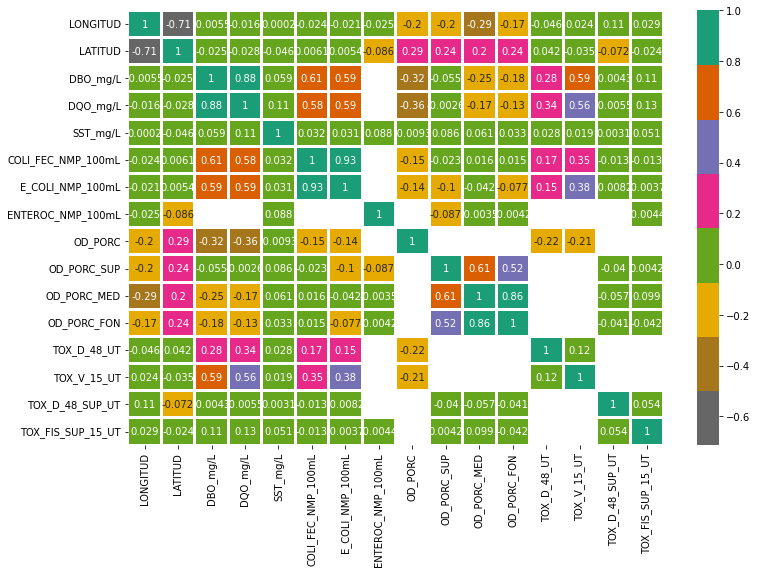

In [21]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [22]:
data.fillna(method='bfill')

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,27.43714,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO
OCRBR5208M1,PUENTE INTERNACIONAL I NUEVO LAREDO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,RIO BRAVO,LOTICO,RIO,-99.50727,27.49901,...,"DQO,",SI,NO,SI,SI,SI,ND,SI,SI,LOTICO
OCRBR5209M1,RIO BRAVO FRENTE A COMAPA,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 10,RIO BRAVO,LOTICO,RIO,-99.52221,27.49631,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO


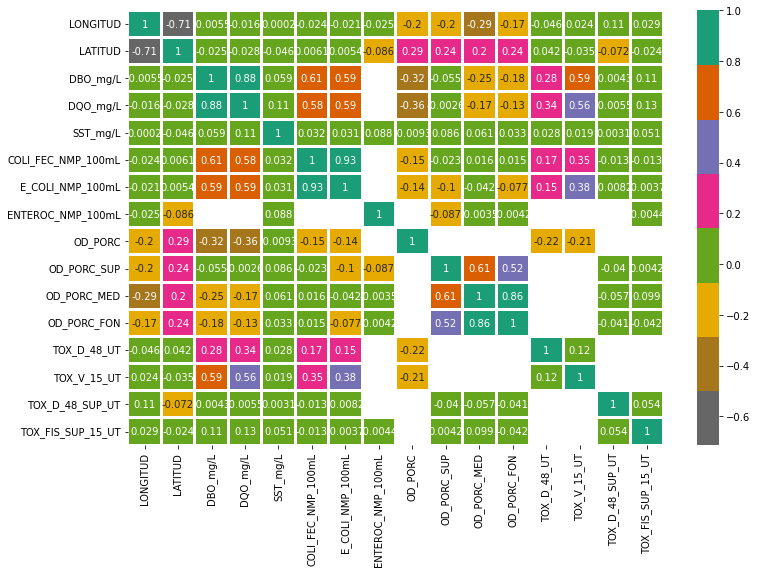

In [23]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [24]:
data = data.dropna(thresh=20)

In [29]:
#data.hist(columns=['SEMAFORO'])

In [30]:
data.isna().sum()

SITIO                        0
ORGANISMO_DE_CUENCA          0
ESTADO                       0
MUNICIPIO                    0
CUENCA                       1
CUERPO DE AGUA              14
TIPO                         0
SUBTIPO                     14
LONGITUD                     0
LATITUD                      0
DBO_mg/L                   912
CALIDAD_DBO                912
DQO_mg/L                   912
CALIDAD_DQO                912
SST_mg/L                     4
CALIDAD_SST                  4
COLI_FEC_NMP_100mL         911
CALIDAD_COLI_FEC           911
E_COLI_NMP_100mL           911
CALIDAD_E_COLI             911
ENTEROC_NMP_100mL         2589
CALIDAD_ENTEROC           2589
OD_PORC                   1696
CALIDAD_OD_PORC           1696
OD_PORC_SUP               1874
CALIDAD_OD_PORC_SUP       1874
OD_PORC_MED               3006
CALIDAD_OD_PORC_MED       3006
OD_PORC_FON               2547
CALIDAD_OD_PORC_FON       2547
TOX_D_48_UT               1677
CALIDAD_TOX_D_48          1677
TOX_V_15

In [31]:
data['SST_mg/L']

CLAVE
DLAGU8          13.7500
DLBAJ100         9.0000
DLBAJ101         9.0000
DLBAJ102        13.9667
DLBAJ103         9.0000
                 ...   
OCRBR5206M1    122.0000
OCRBR5207M1     54.0000
OCRBR5208M1     70.0000
OCRBR5209M1     56.0000
OCRBR5210M1     45.0000
Name: SST_mg/L, Length: 3493, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


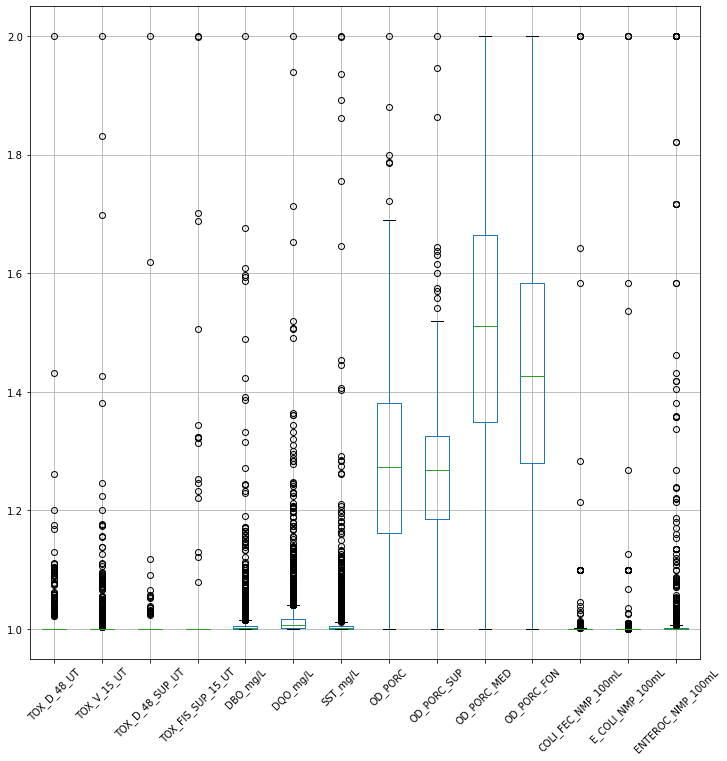

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_transformer = Pipeline(steps= [('MS', MinMaxScaler(feature_range=(1,2)))])
preprocessor = ColumnTransformer(transformers= [('numerical', num_transformer, numeric_features),                                                
                                                ],remainder='passthrough')
data_transform = preprocessor.fit_transform(data[numeric_features])
processed_df = pd.DataFrame(data_transform, columns=preprocessor.feature_names_in_)
processed_df.boxplot(column=numeric_features, figsize=(12,12), rot=45)

**Análisis de clusters con Kmeans**

In [33]:
df = data[['LATITUD','LONGITUD','SEMAFORO']]
df = df.dropna()
df['SEMAFORO'] = df['SEMAFORO'].replace({'Verde':1,'Amarillo':2,'Rojo':3})
df.head()

,LATITUD,LONGITUD,SEMAFORO
CLAVE,,,
DLAGU8,22.24730,-102.33911,3
DLBAJ100,22.90473,-109.84290,1
DLBAJ101,22.89880,-109.86442,1
DLBAJ102,22.89609,-109.88604,1
DLBAJ103,22.87694,-109.89657,1


In [34]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,LATITUD,LONGITUD,SEMAFORO,Coordinates
CLAVE,,,,
DLAGU8,22.24730,-102.33911,3,POINT (-102.33911 22.2473)
DLBAJ100,22.90473,-109.84290,1,POINT (-109.8429 22.90473)
DLBAJ101,22.89880,-109.86442,1,POINT (-109.86442 22.8988)
DLBAJ102,22.89609,-109.88604,1,POINT (-109.88604 22.89609)
DLBAJ103,22.87694,-109.89657,1,POINT (-109.89657 22.87694)


In [35]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,LATITUD,LONGITUD,SEMAFORO,Coordinates
CLAVE,,,,
DLAGU8,22.24730,-102.33911,3,POINT (-102.33911 22.24730)
DLBAJ100,22.90473,-109.84290,1,POINT (-109.84290 22.90473)
DLBAJ101,22.89880,-109.86442,1,POINT (-109.86442 22.89880)
DLBAJ102,22.89609,-109.88604,1,POINT (-109.88604 22.89609)
DLBAJ103,22.87694,-109.89657,1,POINT (-109.89657 22.87694)


In [36]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


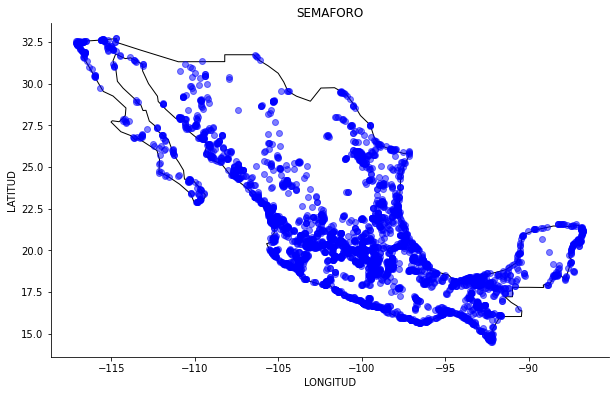

In [37]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gdf.plot(ax=gax, color='blue', alpha = 0.5)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('SEMAFORO')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

In [38]:
clusters = range(2,15)
inertias = [] 
labels = []
for k in clusters:
    m = KMeans(n_clusters=k)
    m.fit(gdf[["LONGITUD","LATITUD"]])
    labels.append(m.labels_)
    inertias.append(m.inertia_)

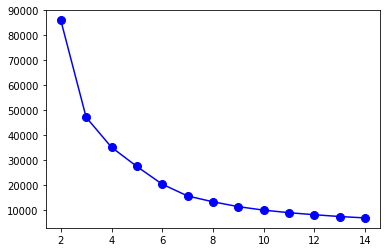

In [39]:
plt.plot(clusters, inertias, 'bo-', markersize=8)
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
ss = []
for l in labels:
    ss.append(silhouette_score(gdf[["LONGITUD","LATITUD"]], labels=l))

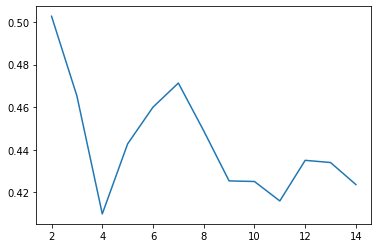

In [41]:
plt.plot(clusters,ss)

In [42]:
# Optimal clusters
kmodel = KMeans(n_clusters=7)
kmodel.fit(gdf[["LONGITUD","LATITUD"]])
centroids = kmodel.cluster_centers_
centroids

array([[ -99.25496834,   24.47451469],
       [-115.73931331,   31.72983835],
       [ -88.12757743,   20.19476814],
       [ -93.54548215,   17.02616961],
       [-103.43400241,   20.60617341],
       [-108.75567715,   26.18665096],
       [ -98.63222872,   18.88753532]])

In [43]:
cdf = pd.DataFrame()
centroids_list = centroids.tolist()
list_of_tuples = [tuple(l) for l in centroids_list]
cdf['latlong'] = list_of_tuples
cdf['c_latlong'] = cdf['latlong'].apply(Point)
cdf2 = gpd.GeoDataFrame(cdf,geometry="c_latlong")

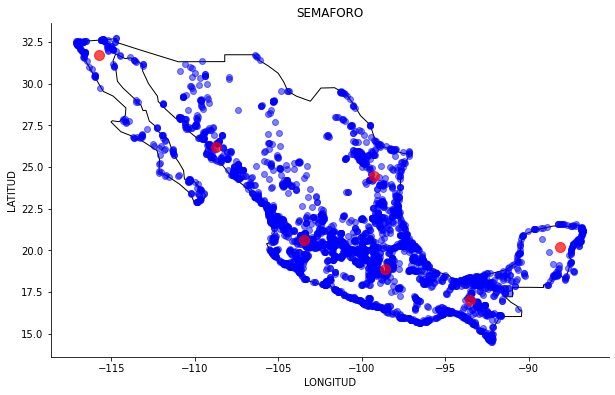

In [44]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gdf.plot(ax=gax, color='blue', alpha = 0.5)
cdf2.plot(ax=gax, color='red', alpha = 0.7, markersize=100)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('SEMAFORO')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

**SEGUNDO ENTREGABLE: Clasificación-ensambles y presentación ejecutiva (10 diapositivas max)**

In [45]:
# Asignacion de variables independientes X y dependiente Y (semáforo)
numeric_features = ['TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT','DBO_mg/L','DQO_mg/L','SST_mg/L','OD_PORC','OD_PORC_SUP',
                    'OD_PORC_MED','OD_PORC_FON','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL']
Catego = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP',
           'CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15',
           'CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']

In [46]:
data['SEMAFORO'] = data['SEMAFORO'].replace({'Verde':1,'Amarillo':2,'Rojo':3})

In [47]:
X=data.loc[:,numeric_features]
Y= data.loc[:,['SEMAFORO']]

In [48]:
X.columns

Index(['TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',
       'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'OD_PORC', 'OD_PORC_SUP',
       'OD_PORC_MED', 'OD_PORC_FON', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL',
       'ENTEROC_NMP_100mL'],
      dtype='object')

In [49]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15)
print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(2969, 14) : dimensión de datos de entrada para entrenamiento y validación
(524, 14) : dimensión de datos de entrada para prueba
(2969, 1) : dimensión de variable de salida para entrenamiento y validación
(524, 1) : dimensión de variable de salida para prueba


In [50]:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = numeric_features

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres)],
                                        remainder='passthrough')

In [51]:
modeloDummy = DummyClassifier(strategy='stratified')
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDummy)])
y_predicciones = TransformedTargetRegressor ( regressor = pipeline)

In [52]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('Logistc Regression')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('Decision Tree')
  
  # MLP - bosque aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=100))
  nombres.append('Random Forest')
  
  
  return modelos, nombres

In [53]:

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  predictions = cross_val_predict(pipeline, Xtv, np.ravel(ytv), cv=3)

  resultados.append(classification_report(np.ravel(ytv), predictions,output_dict=True))
  print ('MODELO: ',nombres [i])
  print(classification_report(np.ravel(ytv), predictions))
  

MODELO:  Logistc Regression
              precision    recall  f1-score   support

           1       0.55      0.67      0.60      1066
           2       0.52      0.46      0.49       955
           3       0.65      0.56      0.60       948

    accuracy                           0.57      2969
   macro avg       0.57      0.56      0.57      2969
weighted avg       0.57      0.57      0.57      2969

MODELO:  Decision Tree
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1066
           2       0.99      0.98      0.98       955
           3       1.00      0.99      1.00       948

    accuracy                           0.99      2969
   macro avg       0.99      0.99      0.99      2969
weighted avg       0.99      0.99      0.99      2969

MODELO:  Random Forest
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      1066
           2       0.98      0.97      0.98       955
 

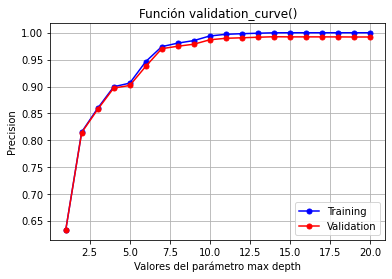

In [74]:
delta_C = np.linspace(1, 20, 20)
modelo = DecisionTreeClassifier()
Xx = columnasTransformer.fit_transform(Xtv)
cvLC = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)
train_scores, valid_scores = validation_curve(modelo, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="max_depth", 
                                              param_range=delta_C,
                                              cv=cvLC,
                                              scoring='accuracy')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro max depth')
plt.ylabel('Precision')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [77]:
modelo = DecisionTreeClassifier()
dicc_grid = {'ccp_alpha':[0.0],'criterion': ['gini', 'entropy'], 'max_depth':[None], 'min_samples_split':[2], 'class_weight':['balanced', None]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring= make_scorer(accuracy_score))

In [78]:
Xx = columnasTransformer.fit_transform(Xtv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.9933308308308308
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Métrica utilizada: make_scorer(accuracy_score)


In [81]:
modelo = DecisionTreeClassifier (ccp_alpha= 0.0, 
                            class_weight=None,
                            criterion ='entropy',
                            max_depth = None,
                            min_samples_split = 2,
                            random_state=1)

Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
dt_classifier = modelo.fit(Xxt, np.ravel(ytv))

Xxtest = Xct.transform(Xtest)
y_predicciones = dt_classifier.predict(Xxtest)
print(f'Desempeño del modelo utilizando la métrica precision: {accuracy_score(ytest, y_predicciones)}' )

Desempeño del modelo utilizando la métrica precision: 0.9923664122137404


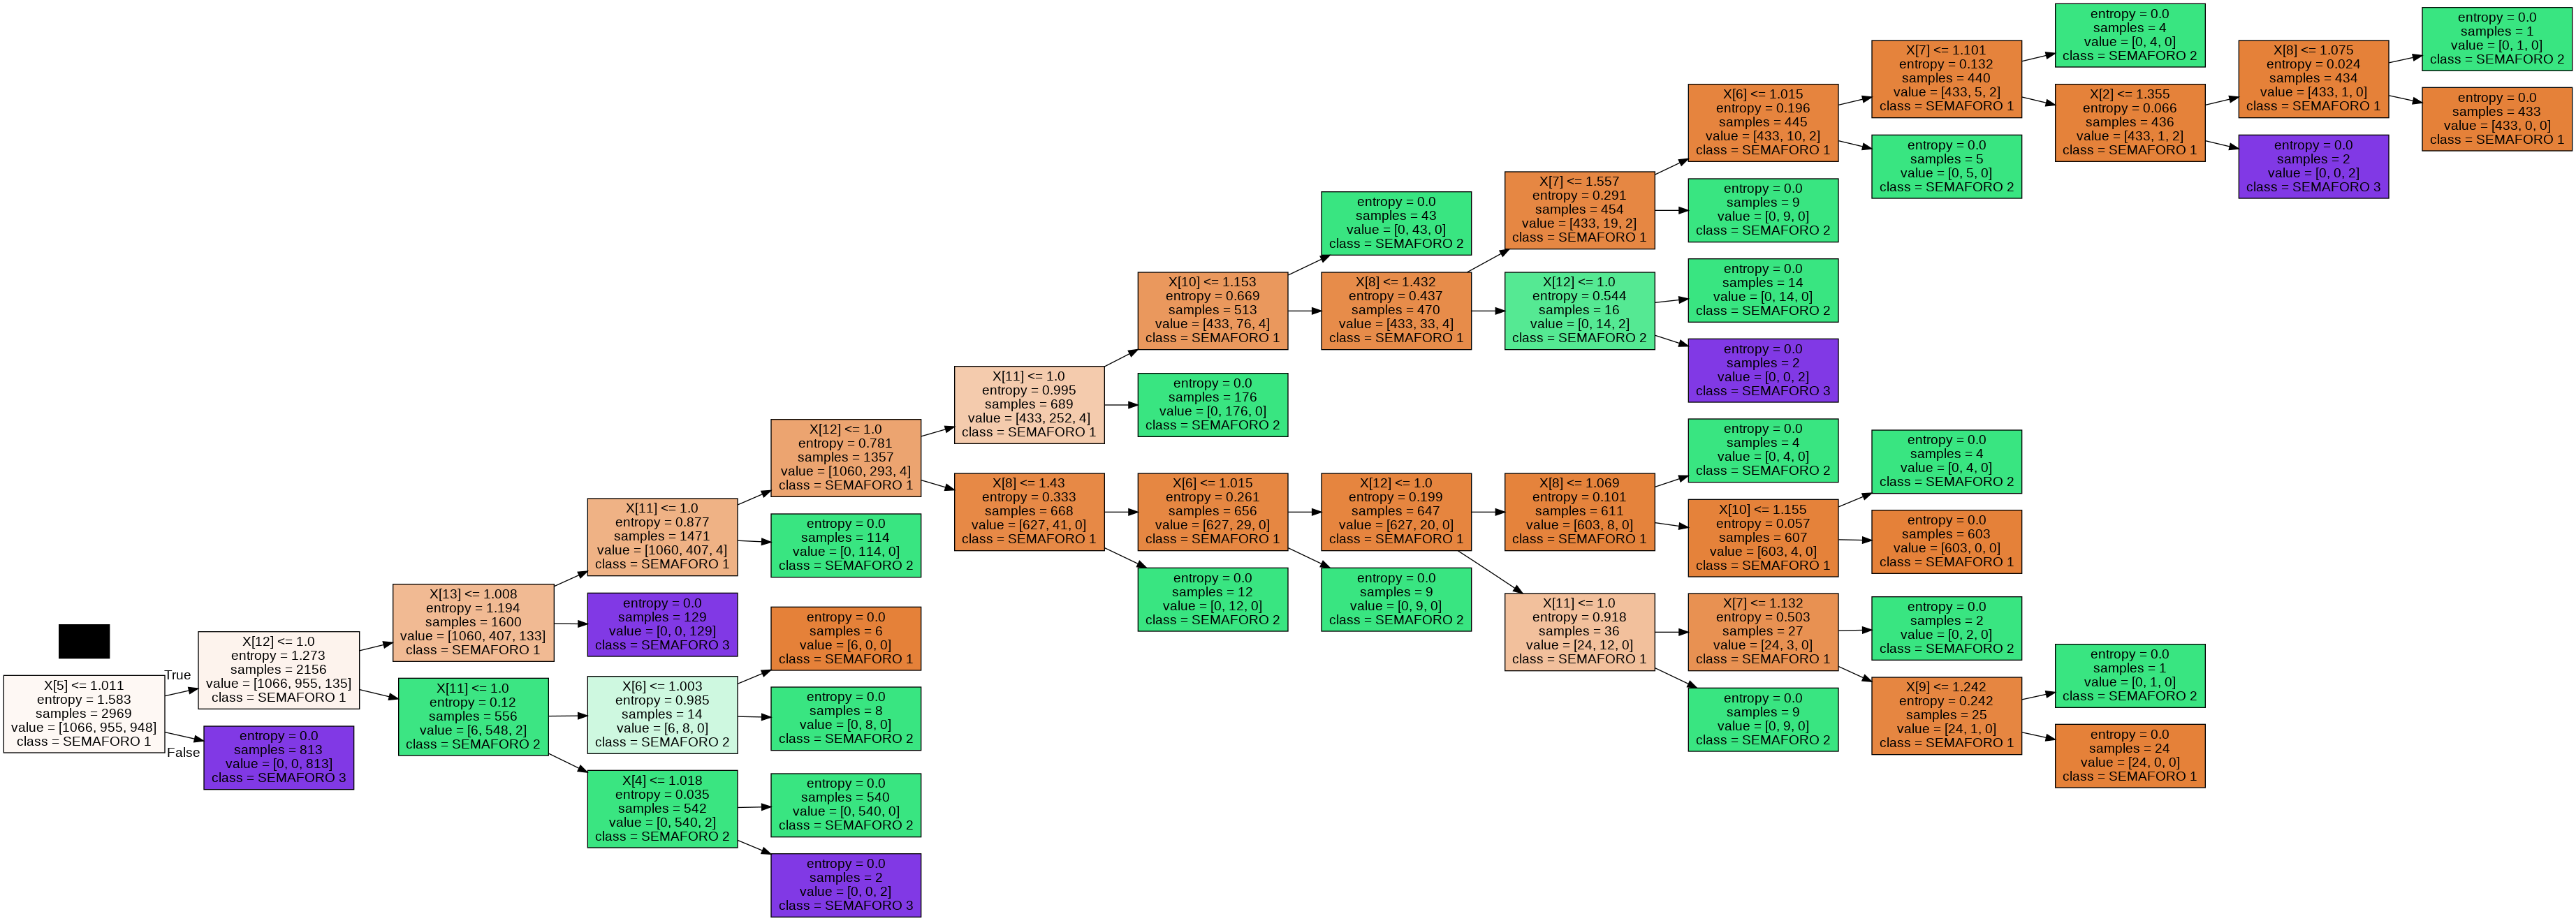

In [89]:
dot_data = tree.export_graphviz(decision_tree=dt_classifier, 
                                out_file=None,
                                max_depth=None,
                                feature_names=None,
                                class_names=['SEMAFORO 1', 'SEMAFORO 2', 'SEMAFORO 3'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())